## Assignment 2 Machine Learning

### Question 1  (100 points) Yeah we maxed our credits card

![](http://www.picslyrics.net/images/97285-katy-perry-t-g-i-f.jpg)

This questions aimed at the case of customer default payments in October, 2005, from an
important bank (a cash and credit card issuer) in Taiwan and the customers were credit card holders of the bank. From the perspective of risk management, the result of predictive accuracy of the payment default will be very valuable for banks to evluate credible or not credible clients. 


**Credit card dataset (default.xls)*

This dataset employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This dataset used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


Answer the following questions using the provided dataset. You can write down intermediate results towards the final answers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("credit_default.xls")
df.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,credit_usage1,payback1
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,689,0,0,0,0,1,0.195650,0.000000
1,1,2,120000,2,2,2,26,-1,2,0,...,3261,0,1000,1000,1000,0,2000,1,0.022350,0.000000
2,2,3,90000,2,2,2,34,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0.324878,0.051917
3,3,4,50000,2,2,1,37,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0.939800,0.042562
4,4,5,50000,1,2,1,57,-1,0,-1,...,19131,2000,36681,10000,9000,689,679,0,0.172340,0.232099


In [3]:
df=pd.DataFrame(df.iloc[:,1:])

**Question 1.1 (20 points)** First, split the data into train (80%) and test set (20%). Use logistic regression from scikit-learn library (with the default hyperparameter) to train on the training set and predict the default of customers in the test set. Report the accuracy, confusion matrix, precision, recall and F1 score on train and test set. Explain whether the Logistic Model is useful in predicting the default behavior.

In [4]:
X_full, y_full = df.drop(["default","ID","credit_usage1" ,"payback1"], axis=1) ,df["default"]

In [5]:
X_full.describe()
X_full.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [6]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc_var = encoder.fit_transform(X_full[['SEX', 'EDUCATION',  'MARRIAGE']] )
X_full=pd.DataFrame(np.hstack((X_full.drop(['SEX', 'EDUCATION', 'MARRIAGE'],axis=1), enc_var)))

X_full.columns=[ 'LIMIT_BAL','AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','SEX1','SEX2',
                'ED1', 'ED2', 'ED3', 'ED4', 'MAR1', 'MAR2', 'MAR3']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

[[4591    0]
 [1330    0]]


(Text(33.0, 0.5, 'True Label'), Text(0.5, 15.0, 'Predicted'))

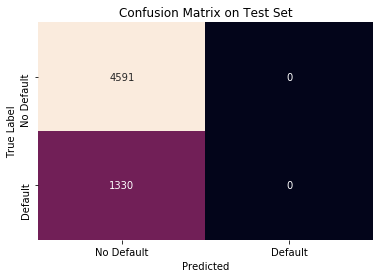

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test) 


from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
## The result is telling us that we have 4591+0 correct predictions and 1330+0 incorrect predictions.
cm=pd.DataFrame(cm, columns=["No Default", "Default"], index=["No Default", "Default"])

sns.heatmap(cm, annot=True,cbar=False, fmt="g")
plt.title("Confusion Matrix on Test Set")
plt.ylabel("True Label"), plt.xlabel("Predicted")

In [9]:
print("The accuracy rate on the Test set is: ",metrics.accuracy_score(y_test, y_pred))
print("The precision rate on the Test set is: ",metrics.precision_score(y_test, y_pred))
print("The recall rate on the Test set is: ",metrics.recall_score(y_test, y_pred))
print("The F1-score on the Test set is: ",metrics.f1_score(y_test, y_pred))

The accuracy rate on the Test set is:  0.7753757811180544
The precision rate on the Test set is:  0.0
The recall rate on the Test set is:  0.0
The F1-score on the Test set is:  0.0


C:\Users\Pierfrancesco\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Pierfrancesco\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[18403     2]
 [ 5275     0]]


(Text(33.0, 0.5, 'True Label'), Text(0.5, 15.0, 'Predicted'))

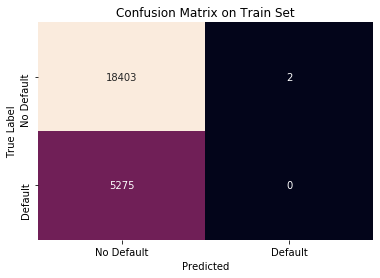

In [10]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_train) 
cm = metrics.confusion_matrix(y_train, y_pred)
print(cm)

## The result is telling us that we have 18403+2 correct predictions and 5275+0 incorrect predictions.
cm=pd.DataFrame(cm, columns=["No Default", "Default"], index=["No Default", "Default"])

sns.heatmap(cm, annot=True,cbar=False, fmt="g")
plt.title("Confusion Matrix on Train Set")
plt.ylabel("True Label"), plt.xlabel("Predicted")

In [11]:
print("The accuracy rate on the Train set is: ",metrics.accuracy_score(y_train, y_pred))
print("The precision rate on the Train set is: ",metrics.precision_score(y_train, y_pred))
print("The recall rate on the Train set is: ",metrics.recall_score(y_train, y_pred))
print("The F1-score on the Train set is: ",metrics.f1_score(y_train, y_pred))

The accuracy rate on the Train set is:  0.7771537162162162
The precision rate on the Train set is:  0.0
The recall rate on the Train set is:  0.0
The F1-score on the Train set is:  0.0


**Question 1.2 (20 points)** Perform 10-fold cross-validation Logistic regression with three different regularization settings on training set (L1, L2, Elastic Net) by varying the hyperparemter of C (the regularizer) and l1_ratio if applicable in elastic net. Then predict the default of customers in the test set. Report the accuracy, confusion matrix, precision, recall and F1 score on both training set and test set. 

In [12]:
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

penalty_value=["l1", "l2"]
C_value=[1.0,0.8,0.6,0.4,0.2,0.1]
l1_ratio_val=[1.0,0.8,0.6,0.4,0.2,0]

res_best_model=[]

for i in penalty_value:
    for j in C_value:
        ## Logistic regression with Lasso L1 and Ridge L2 regularization (C and penalty loop adjustment)
        log_reg=LogisticRegression(penalty=i, C=j, random_state=42)
        ## CV 10-fold prediction on the Train Set
        y_predict = cross_val_predict( log_reg, X_train, y_train, cv=10, n_jobs =-1)
        print("Confusion Metrix with penalty {} and C {}".format(i,j), "\n", confusion_matrix(y_train, y_predict),
             "\n Accuracy {}".format(accuracy_score(y_train, y_predict)),
             "\n Precision {}".format(precision_score(y_train, y_predict)),
             "\n Recall {}".format(recall_score(y_train, y_predict)) ,
             "\n F1-Score {}".format(f1_score(y_train, y_predict))  )
        res_best_model.append(tuple([i,j,accuracy_score(y_train, y_predict)]))

for z in l1_ratio_val:
    for j in C_value: 
        ## Logistic regression with Elastic Net regularization (C and penalty loop adjustment)
        log_reg=LogisticRegression(penalty="elasticnet",solver="saga", C=j, random_state=42, l1_ratio=z)
        ## CV 10-fold prediction on the Train Set
        y_predict = cross_val_predict( log_reg, X_train, y_train, cv=10, n_jobs =-1)
        print("Confusion Metrix with penalty elasticnet, C {}, l1_ratio {}".format(j,z), "\n", confusion_matrix(y_train, y_predict),
             "\n Accuracy {}".format(accuracy_score(y_train, y_predict)),
             "\n Precision {}".format(precision_score(y_train, y_predict)),
             "\n Recall {}".format(recall_score(y_train, y_predict)) ,
             "\n F1-Score {}".format(f1_score(y_train, y_predict))  )
        res_best_model.append(tuple([z,j,accuracy_score(y_train, y_predict)]))

Confusion Metrix with penalty l1 and C 1.0 
 [[17881   524]
 [ 3917  1358]] 
 Accuracy 0.8124577702702702 
 Precision 0.7215727948990436 
 Recall 0.2574407582938389 
 F1-Score 0.3794886125471566
Confusion Metrix with penalty l1 and C 0.8 
 [[17881   524]
 [ 3916  1359]] 
 Accuracy 0.8125 
 Precision 0.7217206585236325 
 Recall 0.2576303317535545 
 F1-Score 0.3797150041911148
Confusion Metrix with penalty l1 and C 0.6 
 [[17880   525]
 [ 3916  1359]] 
 Accuracy 0.8124577702702702 
 Precision 0.7213375796178344 
 Recall 0.2576303317535545 
 F1-Score 0.3796619639614471
Confusion Metrix with penalty l1 and C 0.4 
 [[17881   524]
 [ 3918  1357]] 
 Accuracy 0.8124155405405405 
 Precision 0.721424774056353 
 Recall 0.25725118483412324 
 F1-Score 0.3792621576299609
Confusion Metrix with penalty l1 and C 0.2 
 [[17883   522]
 [ 3922  1353]] 
 Accuracy 0.8123310810810811 
 Precision 0.7216 
 Recall 0.2564928909952607 
 F1-Score 0.3784615384615385
Confusion Metrix with penalty l1 and C 0.1 
 [[17

Confusion Metrix with penalty elasticnet, C 0.2, l1_ratio 0.2 
 [[18398     7]
 [ 5273     2]] 
 Accuracy 0.777027027027027 
 Precision 0.2222222222222222 
 Recall 0.0003791469194312796 
 F1-Score 0.000757002271006813
Confusion Metrix with penalty elasticnet, C 0.1, l1_ratio 0.2 
 [[18398     7]
 [ 5273     2]] 
 Accuracy 0.777027027027027 
 Precision 0.2222222222222222 
 Recall 0.0003791469194312796 
 F1-Score 0.000757002271006813
Confusion Metrix with penalty elasticnet, C 1.0, l1_ratio 0 
 [[18398     7]
 [ 5273     2]] 
 Accuracy 0.777027027027027 
 Precision 0.2222222222222222 
 Recall 0.0003791469194312796 
 F1-Score 0.000757002271006813
Confusion Metrix with penalty elasticnet, C 0.8, l1_ratio 0 
 [[18398     7]
 [ 5273     2]] 
 Accuracy 0.777027027027027 
 Precision 0.2222222222222222 
 Recall 0.0003791469194312796 
 F1-Score 0.000757002271006813
Confusion Metrix with penalty elasticnet, C 0.6, l1_ratio 0 
 [[18398     7]
 [ 5273     2]] 
 Accuracy 0.777027027027027 
 Precisio

The best model which offer the highest accuracy rate  on the prediction for the Train Set is: _"penalty l1 and C 0.1"_

In [13]:
max(res_best_model, key = lambda i : i[2]) 

('l1', 0.1, 0.8127111486486487)

In [28]:
##  predict the default of customers in the test set with the BEST MODEL 
log_reg = LogisticRegression(penalty="l1", C=0.1,random_state=42, solver='liblinear').fit(X_train, y_train)

y_predict_test = log_reg.predict(X_test)

print("The accuracy of model on test set is {}".format(accuracy_score(y_predict_test, y_test)))
print("The precision_score of model on test set is {}".format(precision_score(y_predict_test, y_test)))
print("The recall_score of model on test set is {}".format(recall_score(y_predict_test, y_test)))
print("The f1_score of model on test set is {}".format(f1_score(y_predict_test, y_test)))
print("The confusion_matrix of model on test set is \n {}".format(confusion_matrix(y_predict_test, y_test)))

The accuracy of model on test set is 0.8018915723695321
The precision_score of model on test set is 0.22330827067669173
The recall_score of model on test set is 0.6796338672768879
The f1_score of model on test set is 0.3361629881154499
The confusion_matrix of model on test set is 
 [[4451 1033]
 [ 140  297]]


**Question 1.3 (20 points)** Plot the ROC curve for the model learned in Question 1.2. What is the TPR and FPR when the probability threshold is 0.5. Adjust the probability threshold to 0.75, and then show TPR and FPR again. What is the AUC score under two different probability thresholds? Show the learning curve (the accuracy with respect to training set size) when you are training using [10, 100, 10]% of samples using cross-validation (10%, 20%..., 90%, 100%). Explain whether your model would benefit from additional data.

In [29]:
from sklearn.metrics import roc_curve, auc
log_reg=LogisticRegression(penalty="l1", C=0.1, random_state=42).fit(X_train, y_train)
## predict the probability on the Test set 
y_pred_P = log_reg.predict_proba(X_test)[:,1]
## extrapolate the False Positive rate & True Positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_P) 
## False Positive rate and True Positive rate grid creation for AUC/ROC chart
roc_auc = auc(fpr, tpr)

C:\Users\Pierfrancesco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


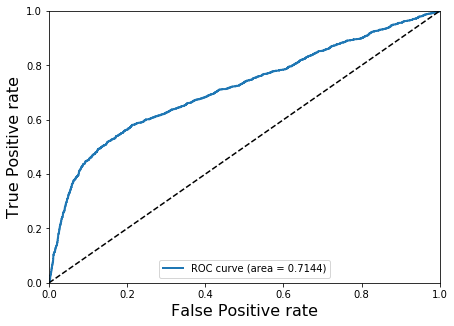

In [30]:
## plot the ROC curve 
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = {})'.format(round(roc_auc,4)))
    plt.legend(loc='lower center')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive rate', fontsize=16)
    plt.ylabel('True Positive rate', fontsize=16)

plt.figure(figsize=(7, 5))
plot_roc_curve(fpr, tpr)

plt.show()

In [31]:
print('True Positive Rate & False Positive Rate when the threshold is 0.5 : {0:1.4f} ; {1:1.4f}'
      .format(tpr[np.argmin(np.abs(thresholds - 0.5))],fpr[np.argmin(np.abs(thresholds - 0.5))]))

True Positive Rate & False Positive Rate when the threshold is 0.5 : 0.2241 ; 0.0305


In [32]:
print('True Positive Rate & False Positive Rate when the threshold is 0.75 : {0:1.4f} ; {1:1.4f}'
      .format(tpr[np.argmin(np.abs(thresholds - 0.75))], fpr[np.argmin(np.abs(thresholds - 0.75))]))

True Positive Rate & False Positive Rate when the threshold is 0.75 : 0.0271 ; 0.0033


In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_P) ## the AUC score does not change between two different trasholds !

0.7144434272350447

**What is the AUC score under two different probability thresholds?**

_Answer:_
AUC’s independence of threshold makes it uniquely qualified for model selection. Therefore the Area Under the Curve will be the same even if the threshold will change from 0.5 to 0.75

In [34]:
## compute the learning curve by adjusting the train size (10%, 20%..., 90%, 100%)
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(penalty="l1", C=0.1, random_state=42, solver='liblinear'),
                                                        X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10)

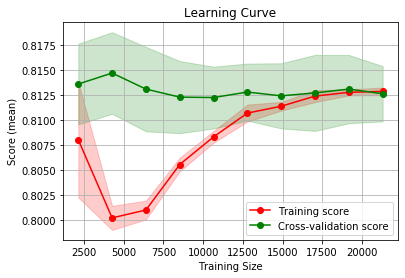

In [35]:
plt.figure()
   
## compute the mean and the standard deviation of the train and valid scores in order to obtain the confidence intervals
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
plt.grid()

## plot the training score with the standanrd deviation from the mean. 
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
## plot the CV score with the standanrd deviation from the mean. 
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.2, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve"), plt.xlabel("Training Size"), plt.ylabel("Score (mean)"), plt.legend(loc="lower right")
plt.show()

From the chart above that the training and test scores are converging while the size of the training increase, so the Logistic Regression with Lasso L1 regularization and inverse alpha C=0.1 benefits from more training data. However, the big variability in the CV means that the model returns error beacuse of the high variance.

**Question 1.4 (20 points)** Now let's try to use the DecisionTree model to perform the same task. By setting the maximum depth of three to be 100, what do you get in terms of accuracy for train set and test set, respectively, can you explain what might have happened? Now perform cross-validation by setting the following hyperparameter max_depth, max_leaf_nodes and min_sample_split. Report the estimator with the best combination of hyperparameter. 

In [22]:
from sklearn.tree import DecisionTreeClassifier
## Decision Tree Classification with 100 as max_depth
D_tree_class = DecisionTreeClassifier(max_depth=100, random_state=42)
D_tree_class.fit(X_train, y_train)

## prediction and accuracy on the Train Set
y_pred = D_tree_class.predict(X_train)
accuracy_score(y_train, y_pred)

0.9994932432432433

In [23]:
## prediction and accuracy on the Test Set
y_pred_test = D_tree_class.predict(X_test)
accuracy_score(y_test, y_pred_test) 

0.7155885830096268

**By setting the maximum depth of three to be 100, what do you get in terms of accuracy for train set and test set, respectively, can you explain what might have happened?**

_Answer:_
As you can se from the high accuracy rate above, predict the class on the Training Set by setting max_depth hyperparameter to 100 will definetly cause an OVERFITTING issue. 

In [24]:
from sklearn.model_selection import GridSearchCV

## create decision tree with the objective of Classification problem
D_tree_class = DecisionTreeClassifier()
## the list of values below is adjusted in order to get a less computational expensive code
# the range() can be adjusted in order to obtain a quicker algorithm for exp. range(2,8,by=2)
max_depth = range(2,8)
max_leaf_nodes = range(2,8)
min_samples_split = range(2,8)
## dictionary of hypermarameters
hyperparameters = dict(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, min_samples_split=min_samples_split)

## fit your model using gridsearch
gridsearch = GridSearchCV(D_tree_class, hyperparameters, cv=10, verbose=0)
best_model = gridsearch.fit(X_train, y_train)

## print all the Parameters that gave the best results:
print('Best parameters found: ',gridsearch.best_params_)

print('Best maximum depth: ', best_model.best_estimator_.get_params()['max_depth'])
print('Best maximum leaf nodes: ', best_model.best_estimator_.get_params()['max_leaf_nodes'])
print('Best minimum samples split: ', best_model.best_estimator_.get_params()['min_samples_split'])

Best parameters found:  {'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_split': 2}
Best maximum depth:  3
Best maximum leaf nodes:  7
Best minimum samples split:  2


In [25]:
## Decision Tree Classification with the best hypermarameters 
D_tree_class = DecisionTreeClassifier(max_depth=best_model.best_estimator_.get_params()['max_depth'], max_leaf_nodes = best_model.best_estimator_.get_params()['max_leaf_nodes'], min_samples_split = best_model.best_estimator_.get_params()['min_samples_split'])
D_tree_class.fit(X_train, y_train)
y_pred = D_tree_class.predict(X_test)
accuracy_score(y_test, y_pred)

0.8125316669481506

**Question 1.5 (20 points)**  As we know that decision tree is a white-box model, we want to communicate with the manager what features may help explain the model predictions. First, use the feature_importances_ to show the top 3 most important features. Then, use the plot_tree function to visualize the tree structure, explain how would you plan to communicate with the manager about the results obtained from predictive model.

In [26]:
df_tree=pd.DataFrame(D_tree_class.feature_importances_, index=[ 'LIMIT_BAL','AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','SEX1','SEX2',
                'ED1', 'ED2', 'ED3', 'ED4', 'MAR1', 'MAR2', 'MAR3'], columns=["Feature_Importance"])
df_tree.sort_values(by=["Feature_Importance"],ascending=False)

,Feature_Importance
PAY_1,0.780803
PAY_2,0.137134
PAY_AMT3,0.046537
PAY_6,0.013083
PAY_5,0.012096
BILL_AMT1,0.010347
MAR1,0.000000
MAR2,0.000000
PAY_AMT5,0.000000
ED4,0.000000


[Text(482.8846153846154, 570.7800000000001, 'PAY_1 <= 1.5\nentropy = 0.346\nsamples = 23680\nvalue = [18405, 5275]'),
 Text(257.53846153846155, 407.70000000000005, 'PAY_2 <= 1.5\nentropy = 0.276\nsamples = 21175\nvalue = [17668, 3507]'),
 Text(128.76923076923077, 244.62, 'PAY_AMT3 <= 803.5\nentropy = 0.245\nsamples = 19382\nvalue = [16606, 2776]'),
 Text(64.38461538461539, 81.53999999999996, 'entropy = 0.336\nsamples = 5631\nvalue = [4430, 1201]'),
 Text(193.15384615384616, 81.53999999999996, 'entropy = 0.203\nsamples = 13751\nvalue = [12176, 1575]'),
 Text(386.3076923076923, 244.62, 'PAY_5 <= 1.0\nentropy = 0.483\nsamples = 1793\nvalue = [1062, 731]'),
 Text(321.9230769230769, 81.53999999999996, 'entropy = 0.459\nsamples = 1237\nvalue = [795, 442]'),
 Text(450.69230769230774, 81.53999999999996, 'entropy = 0.499\nsamples = 556\nvalue = [267, 289]'),
 Text(708.2307692307693, 407.70000000000005, 'PAY_6 <= 1.0\nentropy = 0.415\nsamples = 2505\nvalue = [737, 1768]'),
 Text(643.846153846153

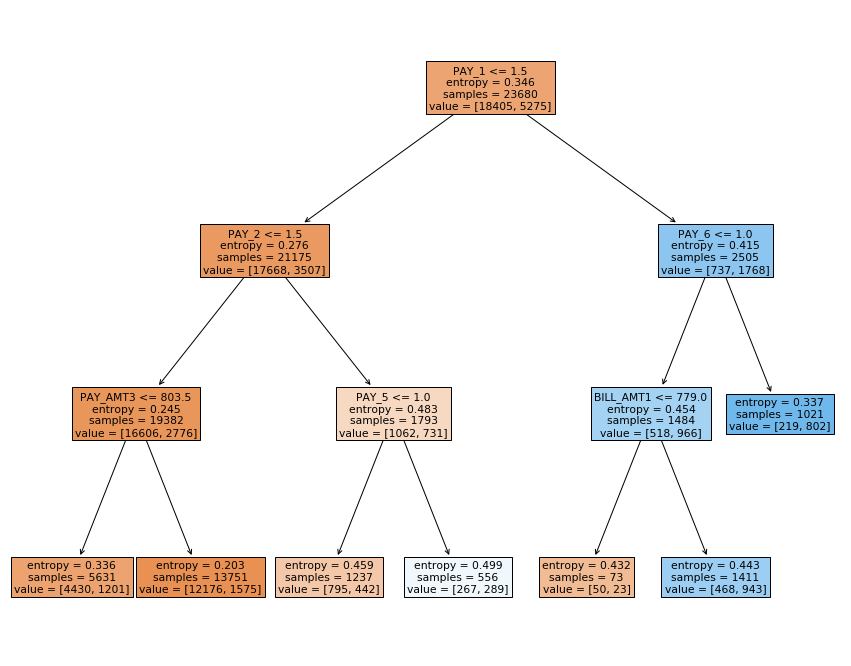

In [27]:
from sklearn import tree

## visualization of the best Decision Tree (Classification)
plt.figure(figsize=(15, 12))
tree.plot_tree(D_tree_class, feature_names=X_train.columns, filled=True)

My reccommendation to the manager is the following:
if the client in the month of September 2005 & August 2005 is delay no more than 1.5 month for the payment, at the same time if on July 2005 the client's amount previusly paid is not exceed 803.5 NT Dollar than the client is SOLVENT.